In [22]:
import numpy as np
import matplotlib.pyplot as plt

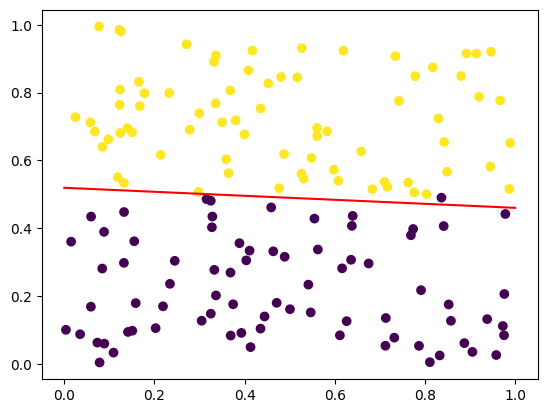

In [128]:
def perceptron(X, y, learning_rate=0.1, num_epochs=10):
    # Inicializando os pesos com valores aleatórios
    w = np.random.rand(X.shape[1]) # 3 pesos aleatórios (2 para as entradas e 1 para o bias)

    # Loop de treinamento
    for epoch in range(num_epochs): # 10 épocas de treinamento
        # Iterando sobre os pontos de treinamento
        for i in range(X.shape[0]): # 150 pontos de treinamento (X.shape[0] = 150)
            # Calculando o produto escalar entre os pesos e a entrada
            z = np.dot(X[i], w) # X[i] = 1 ponto de treinamento (2 dimensões) e w = 3 pesos (2 dimensões)

            # Aplicando a função de ativação (degrau)
            y_pred = 1 if z > 0 else -1 # y_pred = 1 se z > 0, senão y_pred = -1 

            # Atualizando os pesos se a previsão estiver incorreta
            if y_pred != y[i]: # y[i] = 1 se x2 < 0.5, senão y[i] = -1
                w += learning_rate * y[i] * X[i] # Atualizando os pesos
        
        # Plotando a linha de separação atualizada
        plot_line(X, y, w)
        clear_output()

    return w

def plot_line(X, y, w):
    
    # Plotando os pontos de treinamento
    plt.scatter(X[:, 0], X[:, 1], c=y) # X[:, 0] = 150 pontos de x1 e X[:, 1] = 150 pontos de x2 

    # Plotando a linha de separação
    x = np.linspace(0, 1, 100) # 100 pontos de x entre 0 e 1
    y = -w[0] / w[1] * x - w[2] / w[1] #atualizando a linha de separação
    plt.plot(x, y, color='red') # Plotando a linha de separação

    plt.pause(0.5)

#função para limpar o output
def clear_output():
    from IPython.display import clear_output
    clear_output(wait=True)

# Gerando pontos aleatórios
num_points = 150

X = np.random.rand(num_points, 2) # 150 pontos de 2 dimensões
y = np.where(X[:,1] < 0.5, -1, 1) # y = 1 se x2 < 0.5, senão y = -1

# Adicionando o bias
X = np.c_[X, np.ones(num_points)] # Adicionando uma coluna de 1s

# Treinando o perceptron
w = perceptron(X, y)